In [1]:
# Force reload (if changes have been made to the module)
%load_ext autoreload
%autoreload 2

from functions import *

Python version:  3.11.3
Numpy version:  1.24.2
Vegas version:  6.1.3
PETITE home directory: /Users/samuelpatrone/Desktop/Samuel/PhD/Papers/04 - SHIP ALPs/PETITE


In [13]:
E0 = 100. # energy of incident photon in GeV
px, py, pz = 0, 0, E0
particle_dict = {'PID':22, 'ID':0, 'generation_number':0, 'generation_process':'Input'}
p0 = Particle([E0, px, py, pz], [0,0,0], particle_dict)

# Shower(directory, material, minimum_energy)
sGraphite = Shower(PETITE_home_dir+dictionary_dir, "graphite", 0.010)
sLead = Shower(PETITE_home_dir+dictionary_dir, "lead", 0.010)

Nprimary=50
# omega_min=0.01

# photons=photons_from_Nprimary(sLead,p0,Nprimary,omega_min=omega_min,plothisto=True)
#checkandsave('photons_50showers_omegamin1e-2_sLead',photons)
with open('DATA/photons_50showers_omegamin1e-2_sLead', 'rb') as f:
    photons = pickle.load(f)

malist=[0.05,0.1,0.2,0.4,0.6,0.8,1]
axions={}

# for ma in malist:
#     params=params_dict(sLead,ma)
#     axions[ma]=axions_weights_update(sLead,axion_shower_primakhoff(sLead, photons, params),params)
# checkandsave('axions_lead_50showers',axions)

with open('DATA/Old Montecarlo Generator/axions_lead_50showers_light', 'rb') as f:
    axions = pickle.load(f)

# for ma in malist:
#     params=params_dict(sLead,ma)
#     axions[ma]=axions_weights_update(sLead,axion_shower_primakhoff(sLead, photons, params),params)
# checkandsave('axions_lead_50showers_heavy',axions)

with open('DATA/Old Montecarlo Generator/axions_lead_50showers_heavy', 'rb') as f:
    axions.update(pickle.load(f))
    
# malist=[0.05,0.1,0.2,0.4,0.6,0.8,1]
# primary_photons={}
# axions_from_prim={}
# for ma in malist:
#     primary_photons[ma]=[Particle([E0, px, py, pz], [0,0,0], particle_dict) for i in range(len(axions[ma]))]
#     params=params_dict(sLead,ma)
#     axions_from_prim[ma]=axions_weights_update(sLead,axion_shower_primakhoff(sLead, primary_photons[ma], params,method='old'),params)
# checkandsave('DATA/axions_lead_50showers_from_primaries',axions_from_prim)

with open('DATA/Old Montecarlo Generator/axions_lead_50showers_from_primaries', 'rb') as f:
    axions_from_prim=pickle.load(f)
    
for ma in malist:
    params=params_dict(sLead,ma)
    axions_from_prim[ma]=axions_weights_update(sLead,axions_from_prim[ma],params)

In [14]:
gayy_LLP_lowbnd={}
gayy_exact_vs_m={}

for ma in malist:  
    gayy_LLP_lowbnd[ma]=gayy_LLP_approx(axions[ma],Nprimary)
    gayy_exact_vs_m[ma]=gayy_exact(axions[ma],Nprimary,gayy_initial_guess=1e-7,plot=False)

showplots=False
printguess=False

ma=malist[0]
trial=gayy_exact(axions[ma],Nprimary,gayy_initial_guess=4*1e-4,plot=showplots)
if printguess: print(trial)
gayy_exact_vs_m[ma].append(trial[0])

ma=malist[1]
trial=gayy_exact(axions[ma],Nprimary,gayy_initial_guess=1e-4,plot=showplots)
if printguess: print(trial)
gayy_exact_vs_m[ma].append(trial[0])

ma=malist[2]
trial=gayy_exact(axions[ma],Nprimary,gayy_initial_guess=1e-5,plot=showplots)
if printguess: print(trial)
gayy_exact_vs_m[ma].append(trial[0])

ma=malist[3]
trial=gayy_exact(axions[ma],Nprimary,gayy_initial_guess=5*1e-6,plot=showplots)
if printguess: print(trial)
gayy_exact_vs_m[ma].append(trial[0])

ma=malist[4]
trial=gayy_exact(axions[ma],Nprimary,gayy_initial_guess=1e-6,plot=showplots)
if printguess: print(trial)
gayy_exact_vs_m[ma].append(trial[0])

ma=malist[5]
trial=gayy_exact(axions[ma],Nprimary,gayy_initial_guess=1e-6,plot=showplots)
if printguess: print(trial)
gayy_exact_vs_m[ma].append(trial[0])

ma=malist[6]
trial=gayy_exact(axions[ma],Nprimary,gayy_initial_guess=9*1e-7,plot=showplots)
if printguess: print(trial)
gayy_exact_vs_m[ma].append(trial[0])

In [15]:
#Primaries comparison
gayy_LLP_lowbnd_prim={}
gayy_exact_vs_m_prim={}

for ma in malist:  
    gayy_LLP_lowbnd_prim[ma]=gayy_LLP_approx(axions_from_prim[ma],len(axions_from_prim[ma]))
    gayy_exact_vs_m_prim[ma]=gayy_exact(axions_from_prim[ma],len(axions_from_prim[ma]),gayy_initial_guess=1e-7,plot=False)
    
showplots=False
printguess=False

ma=malist[0]
trial=gayy_exact(axions_from_prim[ma],len(axions_from_prim[ma]),gayy_initial_guess=4*1e-4,plot=showplots)
if printguess: print(trial)
gayy_exact_vs_m_prim[ma].append(trial[0])

ma=malist[1]
trial=gayy_exact(axions_from_prim[ma],len(axions_from_prim[ma]),gayy_initial_guess=1e-4,plot=showplots)
if printguess: print(trial)
gayy_exact_vs_m_prim[ma].append(trial[0])

ma=malist[2]
trial=gayy_exact(axions_from_prim[ma],len(axions_from_prim[ma]),gayy_initial_guess=1e-5,plot=showplots)
if printguess: print(trial)
gayy_exact_vs_m_prim[ma].append(trial[0])

ma=malist[3]
trial=gayy_exact(axions_from_prim[ma],len(axions_from_prim[ma]),gayy_initial_guess=5*1e-6,plot=showplots)
if printguess: print(trial)
gayy_exact_vs_m_prim[ma].append(trial[0])

ma=malist[4]
trial=gayy_exact(axions_from_prim[ma],len(axions_from_prim[ma]),gayy_initial_guess=1e-6,plot=showplots)
if printguess: print(trial)
gayy_exact_vs_m_prim[ma].append(trial[0])

ma=malist[5]
trial=gayy_exact(axions_from_prim[ma],len(axions_from_prim[ma]),gayy_initial_guess=1e-6,plot=showplots)
if printguess: print(trial)
gayy_exact_vs_m_prim[ma].append(trial[0])

ma=malist[6]
trial=gayy_exact(axions_from_prim[ma],len(axions_from_prim[ma]),gayy_initial_guess=1e-6,plot=showplots)
if printguess: print(trial)
gayy_exact_vs_m_prim[ma].append(trial[0])

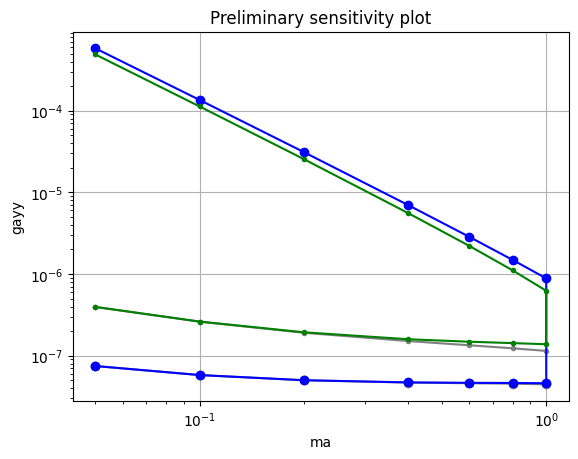

In [16]:
# Define x values (they'll be repeated for each y-value set)
x_values = list(gayy_exact_vs_m.keys())

# Define y-values for each x (two y-values for each x)
y_values_1 = [value[0] for value in gayy_exact_vs_m.values()]
y_values_2 = [value[1] for value in gayy_exact_vs_m.values()]

y_approx=[value for value in gayy_LLP_lowbnd.values()]

# Define x values (they'll be repeated for each y-value set)
x_values_bis = list(gayy_exact_vs_m_prim.keys())

# Define y-values for each x (two y-values for each x)
y_values_1_bis = [value[0] for value in gayy_exact_vs_m_prim.values()]
y_values_2_bis = [value[1] for value in gayy_exact_vs_m_prim.values()]

y_approx_bis=[value for value in gayy_LLP_lowbnd_prim.values()]

#Sensitivity plots from 1904.02091
x = [0.014307965733461651, 0.023917939996142713, 0.03743650630365167, 0.056943045325123946, 0.08435386624025352, 0.12607906851210893, 0.17928706851526016, 0.24802501723299847, 0.3285566400315233, 0.4258900166506733, 0.5379872152594394, 0.6642815515961877, 0.8315620326787738, 0.9595857826657492, 1.0906674234665568, 1.1693248294009844, 1.166971069898281, 1.123259770459854, 1.046041650333748, 0.9623999470971564, 0.9623999470971564, 0.8920841857233212, 0.8920841857233212, 0.8263506949896241, 0.764104717114988, 0.6947454005405271, 0.6085276209092279, 0.5471410600638342, 0.4832489598203918, 0.43130183542683953, 0.3965377680858937, 0.35756254517874714, 0.30221210230495826, 0.27307235236438304, 0.23517617725889087, 0.21106631658643235, 0.21106631658643235, 0.1909867339248269, 0.16287273809324138, 0.14382244772591976, 0.12522836672906712, 0.1043578942988899, 0.08652521600612188, 0.07569791647264974, 0.06441109727856786, 0.05476449714760498, 0.048877556083656695, 0.043168746220442825, 0.037491864511690474, 0.03147095520084311, 0.026203490566104198, 0.019004119802437526, 0.019004119802437526, 0.015329124786348227]
y = [0.0000012666768120613758, 7.524157372513576e-7, 4.327494376782015e-7, 3.5733732979374785e-7, 2.728058614458376e-7, 1.9646261081463785e-7, 1.673055675450687e-7, 1.336814318325365e-7, 1.1273193698681326e-7, 1.0153481070985815e-7, 8.780914517164102e-8, 8.492206557209907e-8, 8.207928727478184e-8, 8.833406434790909e-8, 9.029812922067069e-8, 1.0745342120721669e-7, 1.4263198137687276e-7, 1.7286310783023488e-7, 2.2698548997184515e-7, 3.176173057268487e-7, 3.176173057268487e-7, 3.892594904206177e-7, 3.892594904206177e-7, 4.6774112275970843e-7, 5.713243518876657e-7, 7.400950981497456e-7, 0.0000010018285382691952, 0.000001301867556479099, 0.000001735790798336691, 0.0000022147610662620614, 0.0000027527146039333825, 0.0000035110896870623244, 0.000004660245958192132, 0.000006103430788245332, 0.000008394836040302852, 0.000010723035808353985, 0.000010723035808353985, 0.000014199501172266506, 0.000017862565213976618, 0.000022381486328971243, 0.00003086016238103935, 0.000044324103015700006, 0.00006498414990901684, 0.00008373775143353954, 0.00010805134985287651, 0.00013700059996390302, 0.00018555230764863434, 0.00023797278485342257, 0.00027679689792888446, 0.00039886973567030115, 0.00056393593349528, 0.0010469458757153202, 0.0010469458757153202, 0.0014893632544060102]

# Combine the y-values into a single list
combined_y_values = y_values_1 + y_values_2[::-1]

# Repeat the x-values to match the length of combined y-values
combined_x_values = x_values+x_values[::-1]

# Combine the y-values into a single list
combined_y_values_bis = y_values_1_bis + y_values_2_bis[::-1]

# Repeat the x-values to match the length of combined y-values
combined_x_values_bis = x_values_bis+x_values_bis[::-1]

# Plot the combined values, connecting all points in a single line
plt.plot(x_values, y_approx, marker='o',linestyle='-', color='grey')
plt.plot(x_values_bis, y_approx_bis, marker='.',linestyle='-', color='grey')
plt.plot(combined_x_values, combined_y_values, marker='o',linestyle='-', color='b')
plt.plot(combined_x_values_bis, combined_y_values_bis, marker='.',linestyle='-', color='g')
#plt.plot(x, y,linestyle='-', color='g')

# Label the axes
plt.xlabel('ma')
plt.ylabel('gayy')

plt.xscale('log')
plt.yscale('log')

# Title and grid for better visualization
plt.title('Preliminary sensitivity plot')
plt.grid(True)

# Display the plot
plt.show()